In [26]:
import pandas as pd
import numpy as np

#load the dataframe
with open('census-bureau.columns', 'r') as f:
    column_names = [line.strip() for line in f.readlines()]

df = pd.read_csv('census-bureau.data', names=column_names, header=None)


df.head(10)

,age,class of worker,detailed industry recode,detailed occupation recode,education,wage per hour,enroll in edu inst last wk,marital stat,major industry code,major occupation code,...,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,fill inc questionnaire for veteran's admin,veterans benefits,weeks worked in year,year,label
0,73,Not in universe,0,0,High school graduate,0,Not in universe,Widowed,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,0,95,- 50000.
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Not in universe,Divorced,Construction,Precision production craft & repair,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
2,18,Not in universe,0,0,10th grade,0,High school,Never married,Not in universe or children,Not in universe,...,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,Not in universe,2,0,95,- 50000.
3,9,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
4,10,Not in universe,0,0,Children,0,Not in universe,Never married,Not in universe or children,Not in universe,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,0,0,94,- 50000.
5,48,Private,40,10,Some college but no degree,1200,Not in universe,Married-civilian spouse present,Entertainment,Professional specialty,...,Philippines,United-States,United-States,Native- Born in the United States,2,Not in universe,2,52,95,- 50000.
6,42,Private,34,3,Bachelors degree(BA AB BS),0,Not in universe,Married-civilian spouse present,Finance insurance and real estate,Executive admin and managerial,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.
7,28,Private,4,40,High school graduate,0,Not in universe,Never married,Construction,Handlers equip cleaners etc,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,30,95,- 50000.
8,47,Local government,43,26,Some college but no degree,876,Not in universe,Married-civilian spouse present,Education,Adm support including clerical,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,95,- 50000.
9,34,Private,4,37,Some college but no degree,0,Not in universe,Married-civilian spouse present,Construction,Machine operators assmblrs & inspctrs,...,United-States,United-States,United-States,Native- Born in the United States,0,Not in universe,2,52,94,- 50000.


In [27]:
df.replace('?', 'Missing', inplace=True)

drop_cols = ['label', 'weight', 'year', 
             'fill inc questionnaire for veteran\'s admin', 
             'enroll in edu inst last wk', 
             'migration code-change in msa', 'migration code-change in reg', 
             'migration code-move within reg', 'migration prev res in sunbelt']

X = df.drop(columns=drop_cols, axis=1)

X

,age,class of worker,detailed industry recode,detailed occupation recode,education,wage per hour,marital stat,major industry code,major occupation code,race,...,live in this house 1 year ago,num persons worked for employer,family members under 18,country of birth father,country of birth mother,country of birth self,citizenship,own business or self employed,veterans benefits,weeks worked in year
0,73,Not in universe,0,0,High school graduate,0,Widowed,Not in universe or children,Not in universe,White,...,Not in universe under 1 year old,0,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,2,0
1,58,Self-employed-not incorporated,4,34,Some college but no degree,0,Divorced,Construction,Precision production craft & repair,White,...,No,1,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,2,52
2,18,Not in universe,0,0,10th grade,0,Never married,Not in universe or children,Not in universe,Asian or Pacific Islander,...,Not in universe under 1 year old,0,Not in universe,Vietnam,Vietnam,Vietnam,Foreign born- Not a citizen of U S,0,2,0
3,9,Not in universe,0,0,Children,0,Never married,Not in universe or children,Not in universe,White,...,Yes,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,0,0
4,10,Not in universe,0,0,Children,0,Never married,Not in universe or children,Not in universe,White,...,Yes,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199518,87,Not in universe,0,0,7th and 8th grade,0,Married-civilian spouse present,Not in universe or children,Not in universe,White,...,Not in universe under 1 year old,0,Not in universe,Canada,United-States,United-States,Native- Born in the United States,0,2,0
199519,65,Self-employed-incorporated,37,2,11th grade,0,Married-civilian spouse present,Business and repair services,Executive admin and managerial,White,...,Yes,1,Not in universe,United-States,United-States,United-States,Native- Born in the United States,0,2,52
199520,47,Not in universe,0,0,Some college but no degree,0,Married-civilian spouse present,Not in universe or children,Not in universe,White,...,Not in universe under 1 year old,6,Not in universe,Poland,Poland,Germany,Foreign born- U S citizen by naturalization,0,2,52
199521,16,Not in universe,0,0,10th grade,0,Never married,Not in universe or children,Not in universe,White,...,Not in universe under 1 year old,0,Both parents present,United-States,United-States,United-States,Native- Born in the United States,0,2,0


In [28]:
text_columns = []
number_columns = []
for column in X.columns:
    if X[column].dtype == 'object':
        text_columns.append(column)
    else:
        number_columns.append(column)

#following columns are actually categorical in nature
number_columns.remove('detailed industry recode')
number_columns.remove('detailed occupation recode')
text_columns += ['detailed industry recode', 'detailed occupation recode']

print("# of text columns:", len(text_columns))
print("# of number columns:", len(number_columns))
print("Text columns:", text_columns)
print("Number columns:", number_columns)

# of text columns: 24
# of number columns: 9
Text columns: ['class of worker', 'education', 'marital stat', 'major industry code', 'major occupation code', 'race', 'hispanic origin', 'sex', 'member of a labor union', 'reason for unemployment', 'full or part time employment stat', 'tax filer stat', 'region of previous residence', 'state of previous residence', 'detailed household and family stat', 'detailed household summary in household', 'live in this house 1 year ago', 'family members under 18', 'country of birth father', 'country of birth mother', 'country of birth self', 'citizenship', 'detailed industry recode', 'detailed occupation recode']
Number columns: ['age', 'wage per hour', 'capital gains', 'capital losses', 'dividends from stocks', 'num persons worked for employer', 'own business or self employed', 'veterans benefits', 'weeks worked in year']


In [29]:
from sklearn.preprocessing import StandardScaler,OneHotEncoder

def scale_numeric_data(X_data,num_cols):
    X_scaled = X_data.copy()
    scaler = StandardScaler()
    X_scaled[num_cols] = scaler.fit_transform(X_data[num_cols])
    return X_scaled

def encode_categorical_data(X_data,cat_cols):
    X_encoded = X_data.copy()
    encoder = OneHotEncoder(sparse_output=False, drop='first')
    encoded_cols = encoder.fit_transform(X_data[cat_cols])
    encoded_col_names = encoder.get_feature_names_out(cat_cols)
    encoded_df = pd.DataFrame(encoded_cols, columns=encoded_col_names, index=X_data.index)
    X_encoded = pd.concat([X_encoded.drop(columns=cat_cols), encoded_df], axis=1)
    return X_encoded

X = scale_numeric_data(X, number_columns)
X = encode_categorical_data(X, text_columns)
X

,age,wage per hour,capital gains,capital losses,dividends from stocks,num persons worked for employer,own business or self employed,veterans benefits,weeks worked in year,class of worker_Local government,...,detailed occupation recode_37,detailed occupation recode_38,detailed occupation recode_39,detailed occupation recode_40,detailed occupation recode_41,detailed occupation recode_42,detailed occupation recode_43,detailed occupation recode_44,detailed occupation recode_45,detailed occupation recode_46
0,1.725879,-0.201629,-0.092542,-0.137236,-0.099553,-0.827096,-0.316851,0.569799,-0.949346,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.053560,-0.201629,-0.092542,-0.137236,-0.099553,-0.404284,-0.316851,0.569799,1.180804,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.739291,-0.201629,-0.092542,-0.137236,-0.099553,-0.827096,-0.316851,0.569799,-0.949346,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.142682,-0.201629,-0.092542,-0.137236,-0.099553,-0.827096,-0.316851,-1.779077,-0.949346,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-1.097861,-0.201629,-0.092542,-0.137236,-0.099553,-0.827096,-0.316851,-1.779077,-0.949346,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199518,2.353376,-0.201629,-0.092542,-0.137236,-0.099553,-0.827096,-0.316851,0.569799,-0.949346,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
199519,1.367309,-0.201629,1.273711,-0.137236,-0.095017,-0.404284,-0.316851,0.569799,1.180804,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
199520,0.560526,-0.201629,-0.092542,-0.137236,-0.020427,1.709774,-0.316851,0.569799,1.180804,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
199521,-0.828933,-0.201629,-0.092542,-0.137236,-0.099553,-0.827096,-0.316851,0.569799,-0.949346,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
#reducing noisy features
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95, random_state=42)
X = pca.fit_transform(X)
X.shape

(199523, 89)

In [31]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


K_range = range(3, 11)

#sub-sample for test
sample_size = min(20000, X.shape[0])
indices = np.random.choice(X.shape[0], sample_size, replace=False)
X_sample = X[indices]


print("\n...Training K-Means Models...\n")

#priotitize silhouette score for best k selection
best_k = 2
best_kmeans = None
max_silhouette = -1

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=0, n_init=10)
    kmeans.fit(X)
    
    inertia = kmeans.inertia_
    score = silhouette_score(X_sample, kmeans.predict(X_sample))
    if score > max_silhouette:
        max_silhouette = score
        best_k = k
        best_kmeans = kmeans
    

    print(f"K={k} | Inertia={inertia:.0f} | Silhouette={score:.4f}")

print(f"\nBest K: {best_k} with Silhouette Score: {max_silhouette:.4f}")


...Training K-Means Models...

K=3 | Inertia=2497460 | Silhouette=0.2139
K=4 | Inertia=2311968 | Silhouette=0.2292
K=5 | Inertia=2147077 | Silhouette=0.2394
K=6 | Inertia=1966780 | Silhouette=0.2544
K=7 | Inertia=1953643 | Silhouette=0.2179
K=8 | Inertia=1788367 | Silhouette=0.2427
K=9 | Inertia=1720938 | Silhouette=0.2427
K=10 | Inertia=1653873 | Silhouette=0.2358

Best K: 6 with Silhouette Score: 0.2544


In [32]:

clusters = best_kmeans.fit_predict(X)

df['Cluster'] = clusters


print(f"--- CLUSTER SIZES (K={best_k}) ---")
print(df['Cluster'].value_counts().sort_index())

# Numerical Profile
num_summary = df.groupby('Cluster')[number_columns].mean()

cat_summary = df.groupby('Cluster')[text_columns].agg(lambda x: f"{x.mode()[0]} ({x.value_counts(normalize=True).max():.1%})")

cluster_summary = pd.concat([num_summary, cat_summary], axis=1)

cluster_summary


--- CLUSTER SIZES (K=6) ---
Cluster
0    77198
1    17445
2    47515
3    53176
4     3797
5      392
Name: count, dtype: int64


,age,wage per hour,capital gains,capital losses,dividends from stocks,num persons worked for employer,own business or self employed,veterans benefits,weeks worked in year,class of worker,...,detailed household and family stat,detailed household summary in household,live in this house 1 year ago,family members under 18,country of birth father,country of birth mother,country of birth self,citizenship,detailed industry recode,detailed occupation recode
Cluster,,,,,,,,,,,,,,,,,,,,,
0,39.419881,116.384349,445.693243,0.379531,187.961255,3.849115,0.008899,1.992811,46.768427,Private (70.4%),...,Householder (39.3%),Householder (51.2%),Not in universe under 1 year old (49.8%),Not in universe (98.1%),United-States (81.1%),United-States (81.5%),United-States (86.4%),Native- Born in the United States (86.4%),33 (16.1%),2 (9.0%)
1,33.998108,96.757065,384.295959,0.690456,123.965033,3.725824,1.897163,1.992089,43.645514,Private (71.4%),...,Householder (35.7%),Householder (52.4%),Not in universe under 1 year old (51.5%),Not in universe (97.2%),United-States (88.1%),United-States (88.0%),United-States (91.7%),Native- Born in the United States (91.7%),33 (18.3%),26 (8.3%)
2,55.526676,1.061286,138.163254,0.439209,375.355888,0.242955,0.001515,1.974492,1.394570,Not in universe (92.2%),...,Spouse of householder (32.2%),Householder (48.9%),Not in universe under 1 year old (50.0%),Not in universe (99.0%),United-States (71.9%),United-States (73.1%),United-States (84.1%),Native- Born in the United States (84.1%),0 (92.7%),0 (92.7%)
3,7.944016,0.471961,0.106702,0.000000,0.748815,0.040394,0.000019,0.216752,0.170679,Not in universe (98.6%),...,Child <18 never marr not in subfamily (91.1%),Child under 18 never married (91.1%),Not in universe under 1 year old (52.5%),Both parents present (70.3%),United-States (82.0%),United-States (82.7%),United-States (95.1%),Native- Born in the United States (95.1%),0 (99.0%),0 (99.0%)
4,43.984461,79.317356,0.000000,1944.362918,729.056360,3.466948,0.274954,1.982091,41.656571,Private (57.0%),...,Householder (63.2%),Householder (83.1%),Not in universe under 1 year old (49.5%),Not in universe (97.8%),United-States (81.8%),United-States (83.0%),United-States (89.8%),Native- Born in the United States (89.8%),0 (16.7%),0 (16.7%)
5,46.844388,24.706633,99630.780612,0.000000,5346.431122,3.331633,0.265306,1.992347,47.426020,Private (51.0%),...,Householder (86.5%),Householder (98.0%),Not in universe under 1 year old (53.3%),Not in universe (100.0%),United-States (80.6%),United-States (81.1%),United-States (88.5%),Native- Born in the United States (88.5%),42 (14.0%),2 (27.3%)


In [33]:
cluster_summary.to_csv('kmeans_cluster_summary.csv', index=True)

In [37]:
cluster_summary = pd.read_csv('kmeans_cluster_summary.csv')
cluster_summary.columns

Index(['Cluster', 'age', 'wage per hour', 'capital gains', 'capital losses',
       'dividends from stocks', 'num persons worked for employer',
       'own business or self employed', 'veterans benefits',
       'weeks worked in year', 'class of worker', 'education', 'marital stat',
       'major industry code', 'major occupation code', 'race',
       'hispanic origin', 'sex', 'member of a labor union',
       'reason for unemployment', 'full or part time employment stat',
       'tax filer stat', 'region of previous residence',
       'state of previous residence', 'detailed household and family stat',
       'detailed household summary in household',
       'live in this house 1 year ago', 'family members under 18',
       'country of birth father', 'country of birth mother',
       'country of birth self', 'citizenship', 'detailed industry recode',
       'detailed occupation recode'],
      dtype='object')

C:\Users\debad\AppData\Local\Temp\ipykernel_13640\1115684119.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=means, x='Cluster', y=feature, palette='viridis')


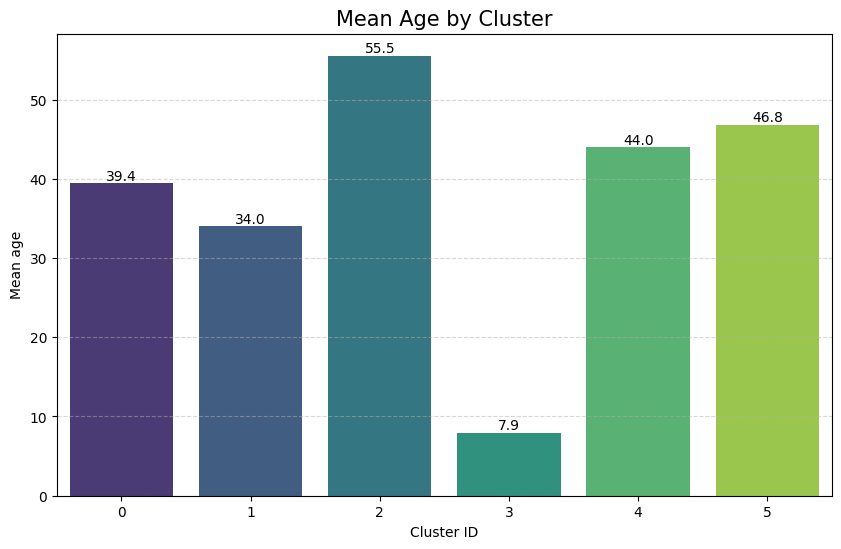

C:\Users\debad\AppData\Local\Temp\ipykernel_13640\1115684119.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=means, x='Cluster', y=feature, palette='viridis')


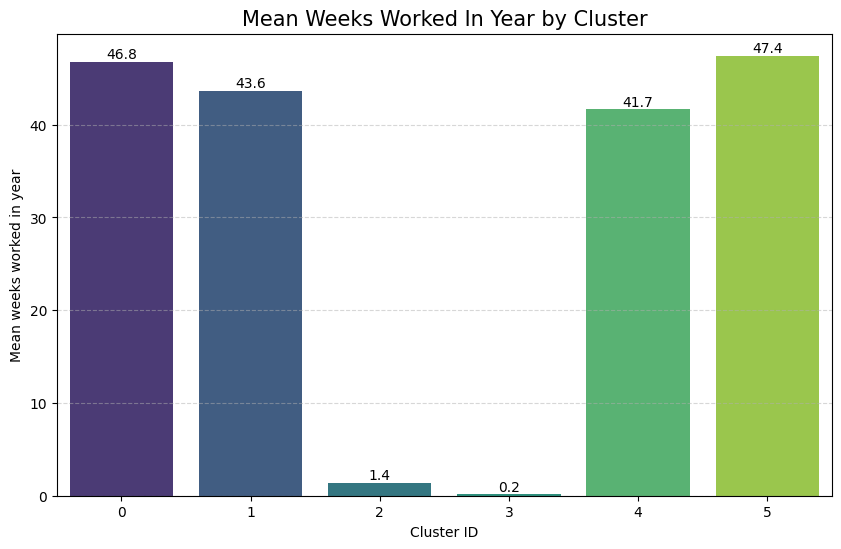

C:\Users\debad\AppData\Local\Temp\ipykernel_13640\1115684119.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=means, x='Cluster', y=feature, palette='viridis')


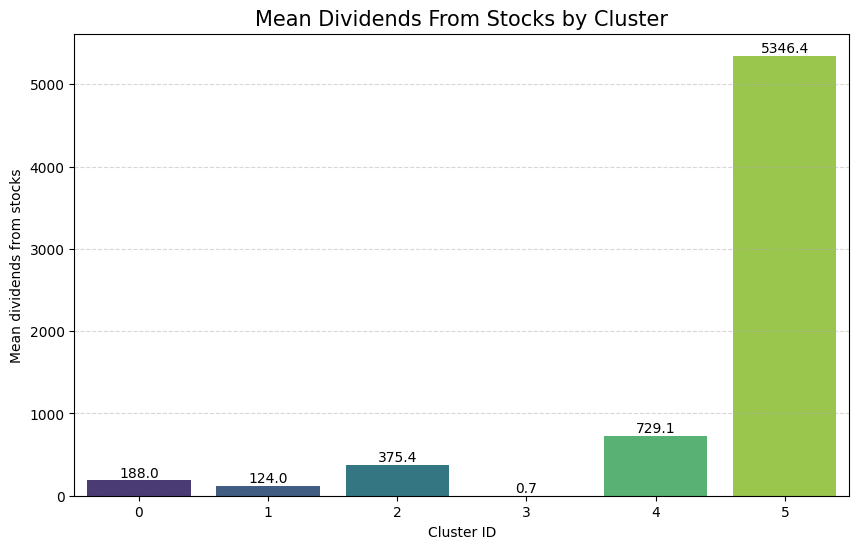

C:\Users\debad\AppData\Local\Temp\ipykernel_13640\1115684119.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=means, x='Cluster', y=feature, palette='viridis')


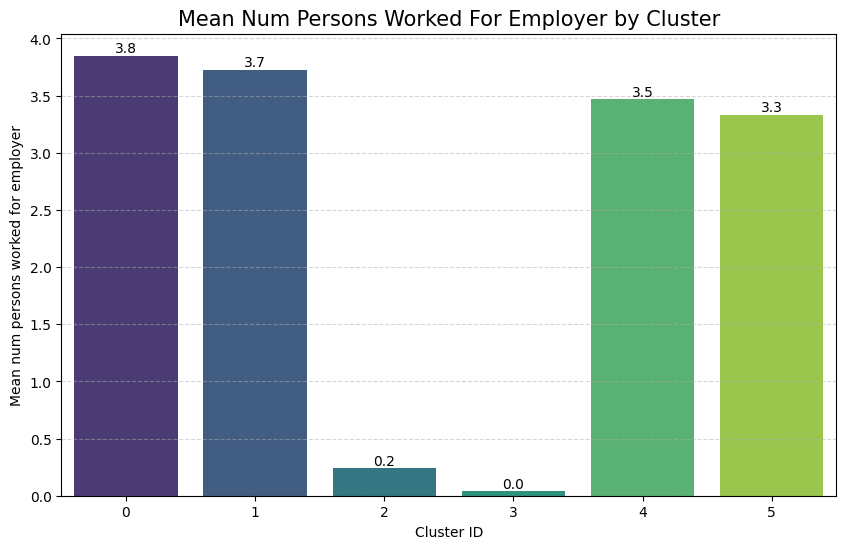

C:\Users\debad\AppData\Local\Temp\ipykernel_13640\1115684119.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=means, x='Cluster', y=feature, palette='viridis')


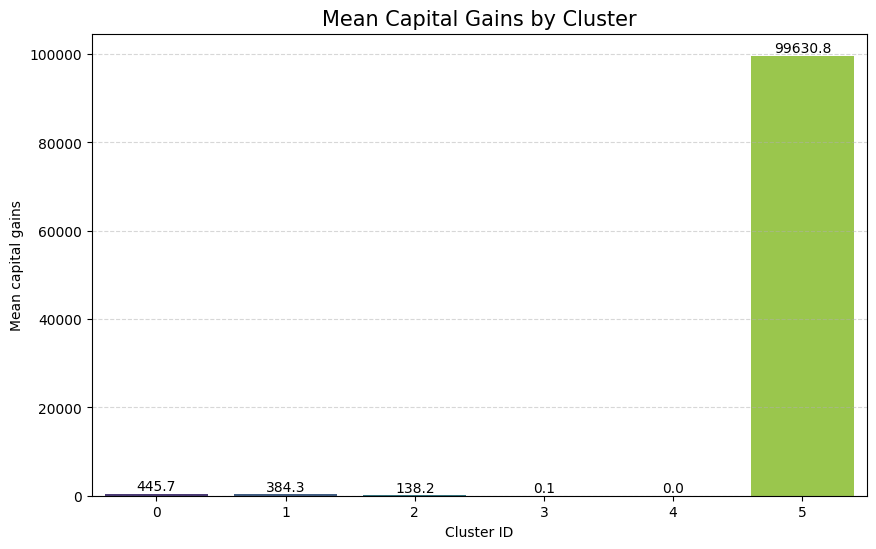

C:\Users\debad\AppData\Local\Temp\ipykernel_13640\1115684119.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=means, x='Cluster', y=feature, palette='viridis')


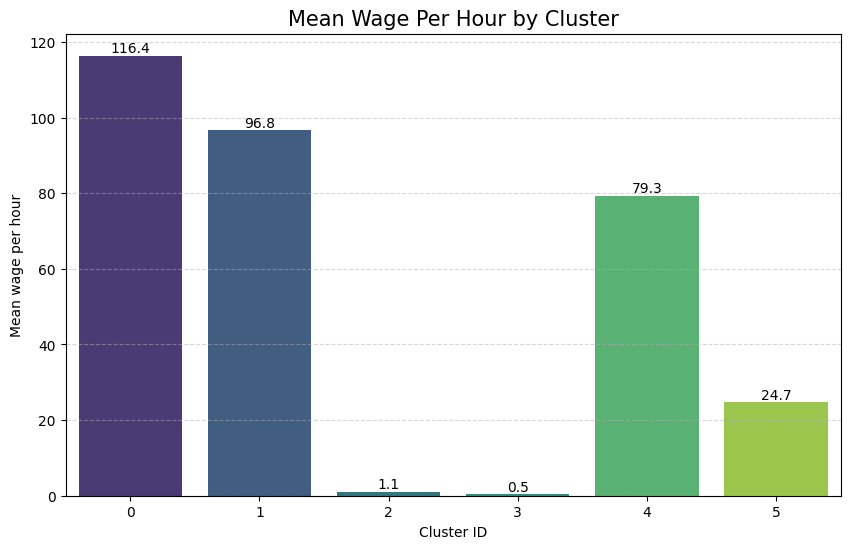

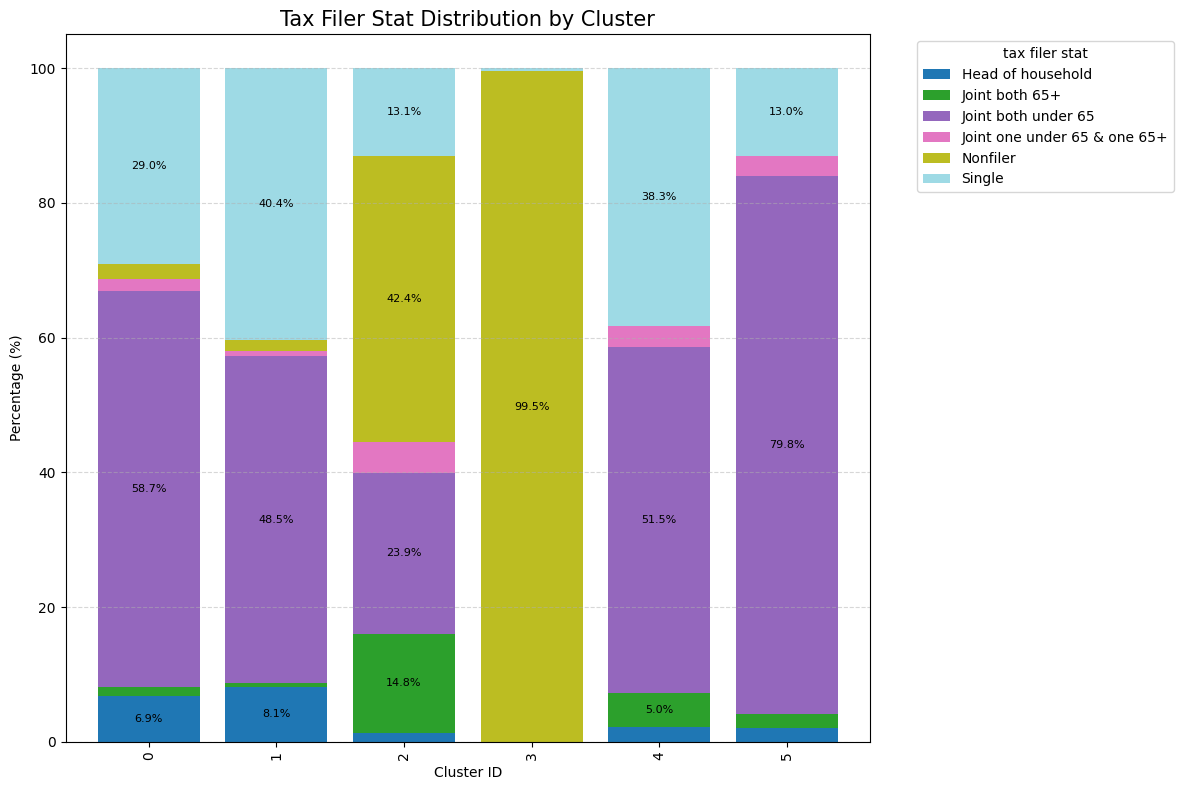

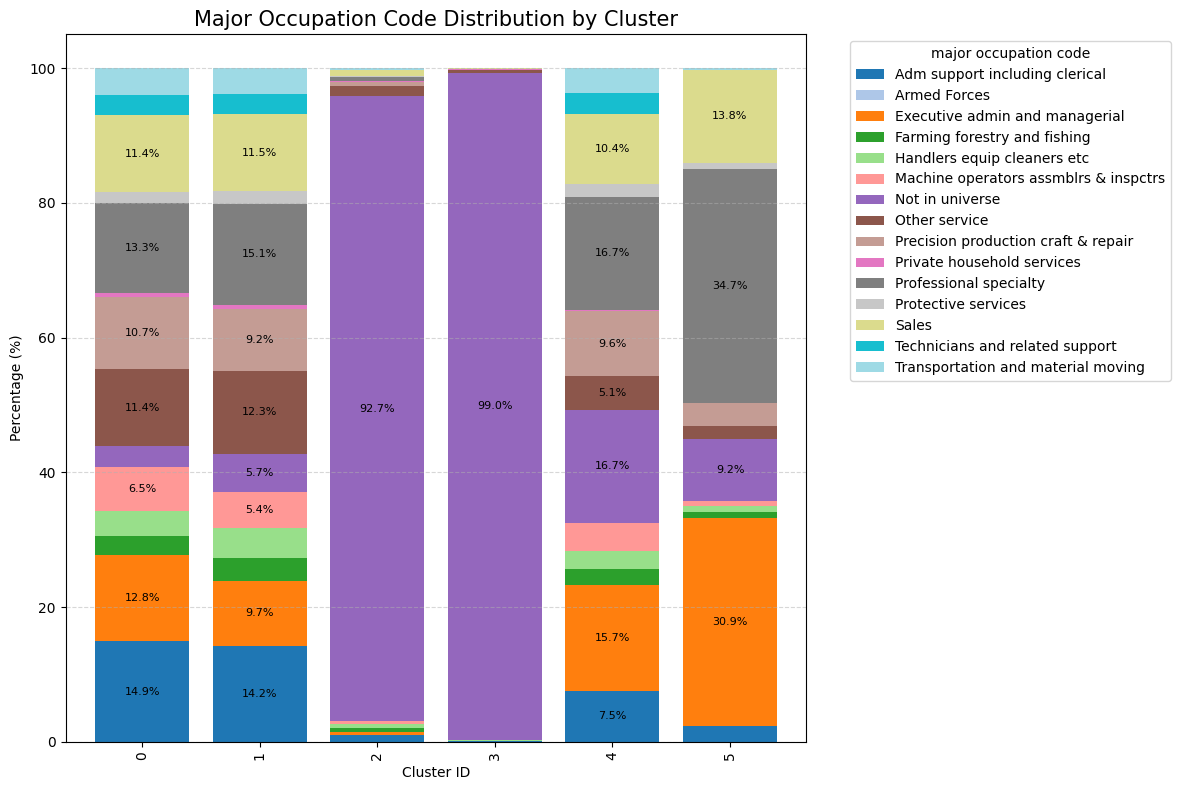

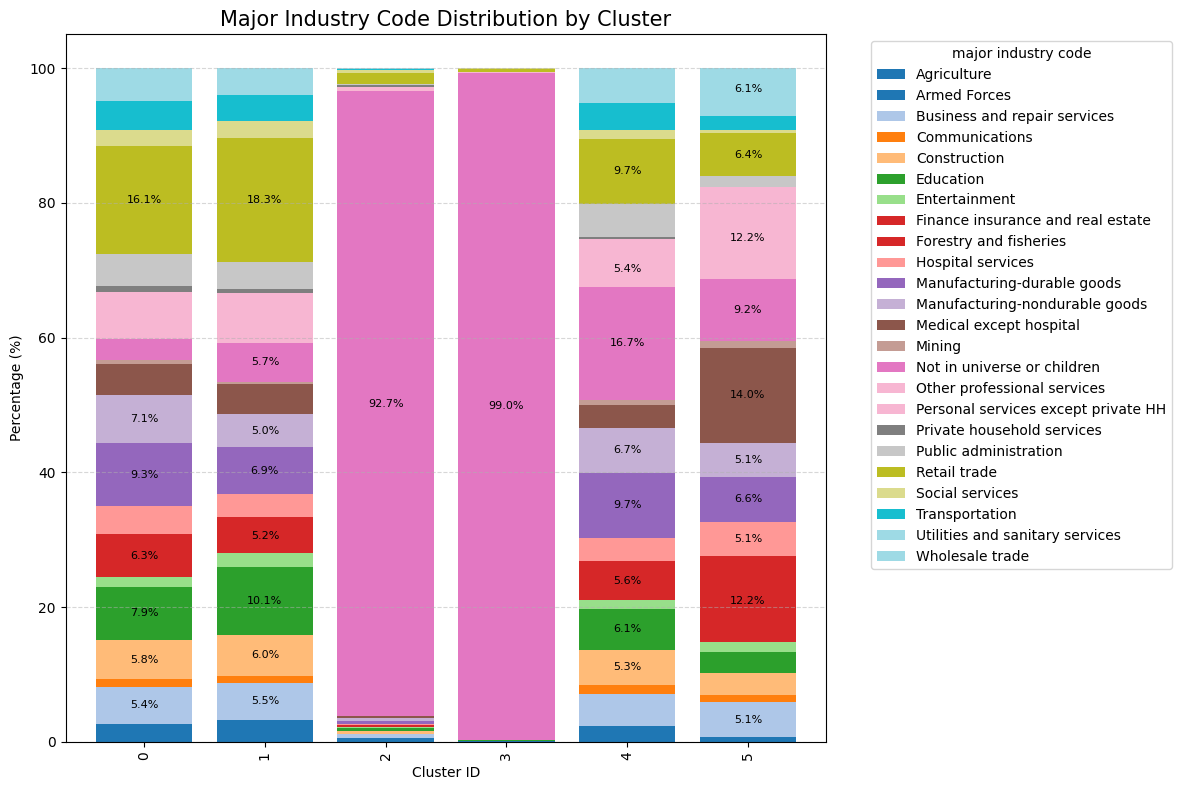

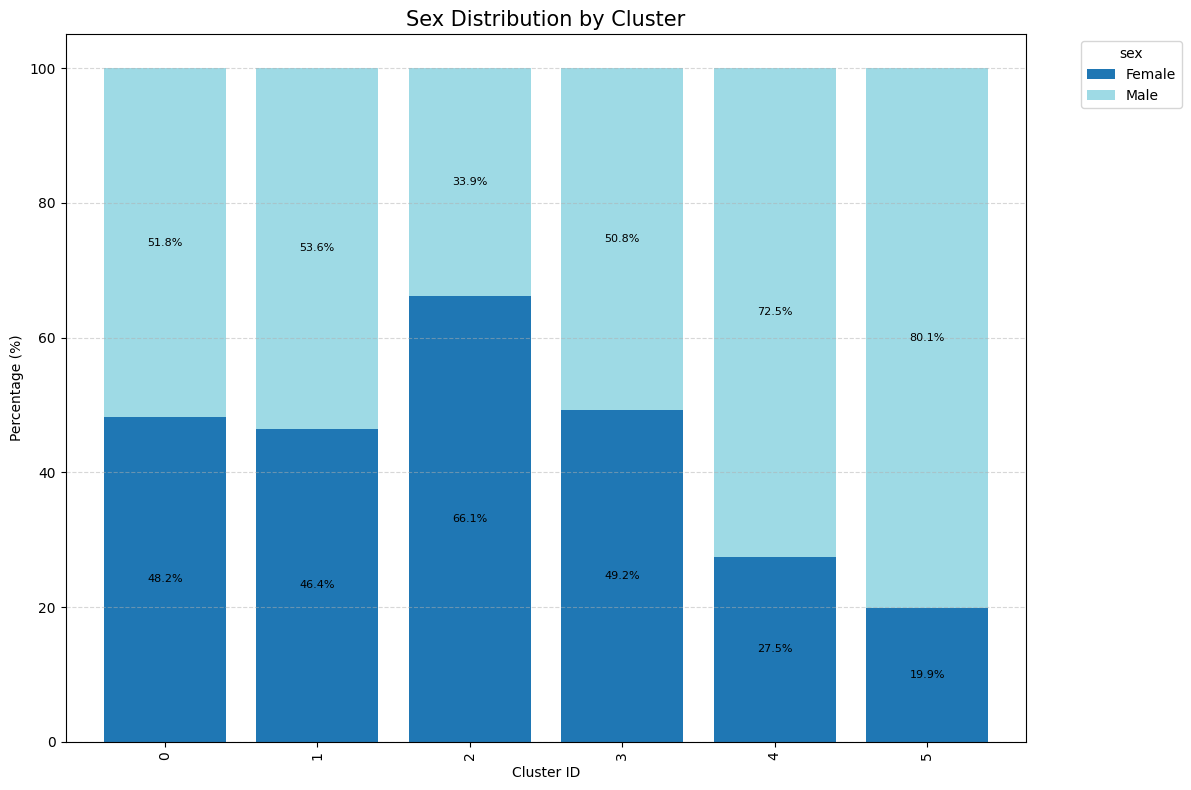

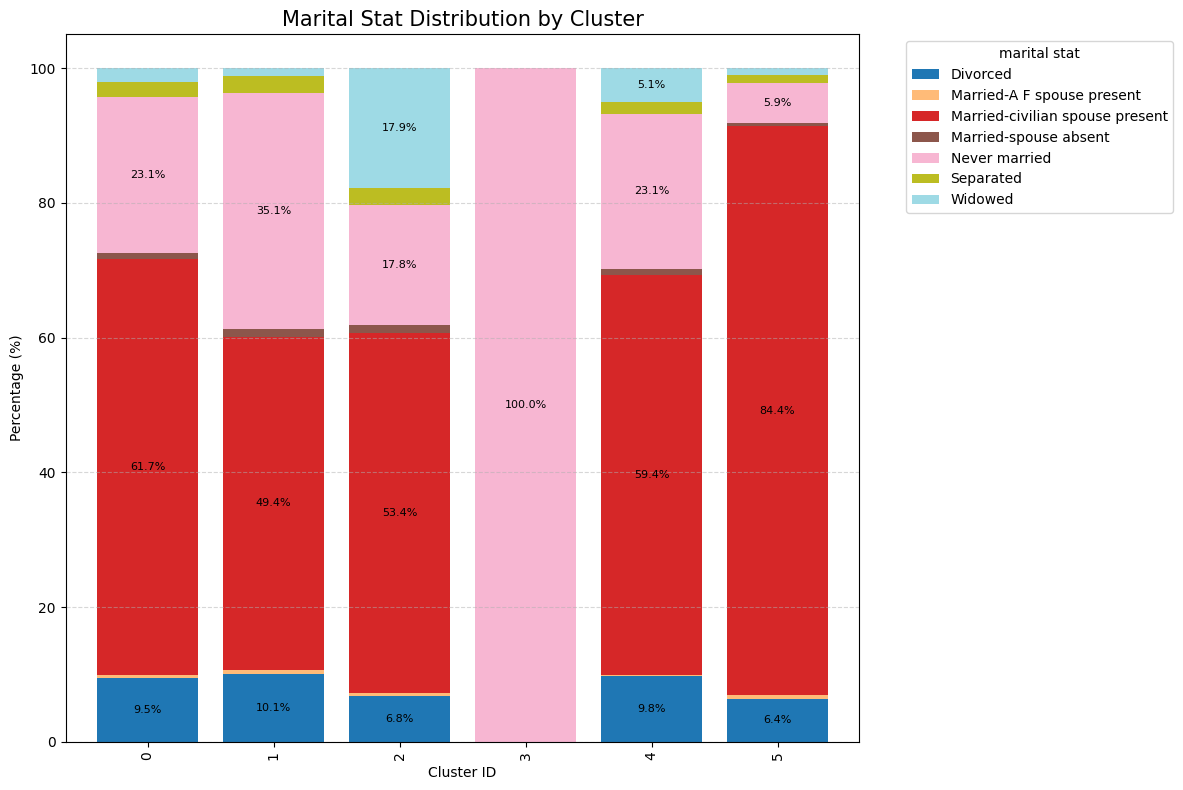

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns


num_features = ['age', 'weeks worked in year', 'dividends from stocks', 'num persons worked for employer','capital gains', 'wage per hour']
cat_features = ['tax filer stat', 'major occupation code', 'major industry code', 'sex','marital stat']

#numerical features    
for feature in num_features:
    plt.figure(figsize=(10, 6))
        
    means = df.groupby('Cluster')[feature].mean().reset_index()
    
    sns.barplot(data=means, x='Cluster', y=feature, palette='viridis')
    plt.title(f'Mean {feature.title()} by Cluster', fontsize=15)
    plt.xlabel('Cluster ID')
    plt.ylabel(f'Mean {feature}')
    plt.grid(axis='y', linestyle='--', alpha=0.5)
           
    for index, row in means.iterrows():
        plt.text(index, row[feature], f'{row[feature]:.1f}', color='black', ha="center", va="bottom")
            
    plt.show()

#categorical features
for feature in cat_features:
    ct = pd.crosstab(df['Cluster'], df[feature], normalize='index') * 100
    ax = ct.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab20', width=0.8)
        
    plt.title(f'{feature.title()} Distribution by Cluster', fontsize=15)
    plt.xlabel('Cluster ID')
    plt.ylabel('Percentage (%)')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title=feature)
    plt.grid(axis='y', linestyle='--', alpha=0.5)
        
        
    for c in ax.containers:
        labels = [f'{v.get_height():.1f}%' if v.get_height() > 5 else '' for v in c]
        ax.bar_label(c, labels=labels, label_type='center', fontsize=8)

    plt.tight_layout()
    plt.show()